In [1]:
#Importing necessary libraries
# Test change
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Importing Training dataset
train_data = pd.read_csv("/kaggle/input/titanic/train.csv") 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Importing Testing dataset
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [9]:
#Droping cabin feature as it has a lot of missing values
train_data = train_data.drop(['Cabin'],axis=1) 

In [10]:
train_data.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
#Filling Null Values
for col_name in train_data.columns:
    if train_data[col_name].dtypes=='object':
        train_data[col_name] = train_data[col_name].fillna(train_data[col_name].mode()[0])
    else:
        train_data[col_name] = train_data[col_name].fillna(train_data[col_name].mean())

In [12]:
train_data.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train_data.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#Checking how many people survived
train_data['Survived'].value_counts() 

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

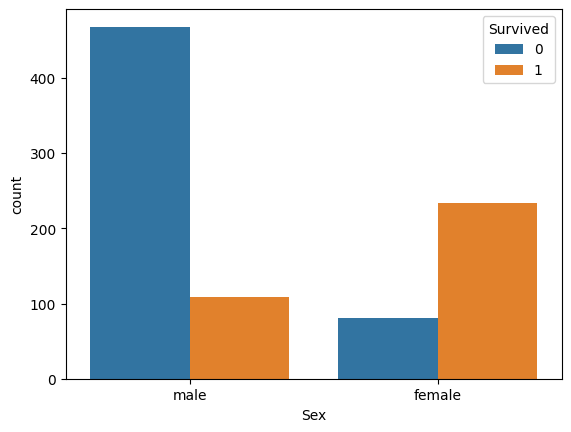

In [15]:
sns.countplot(x='Sex',hue = 'Survived', data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

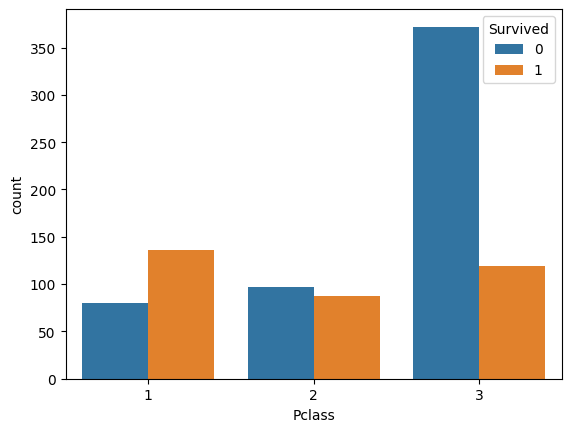

In [16]:
sns.countplot(x='Pclass',hue = 'Survived', data=train_data)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Survived', ylabel='Age'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


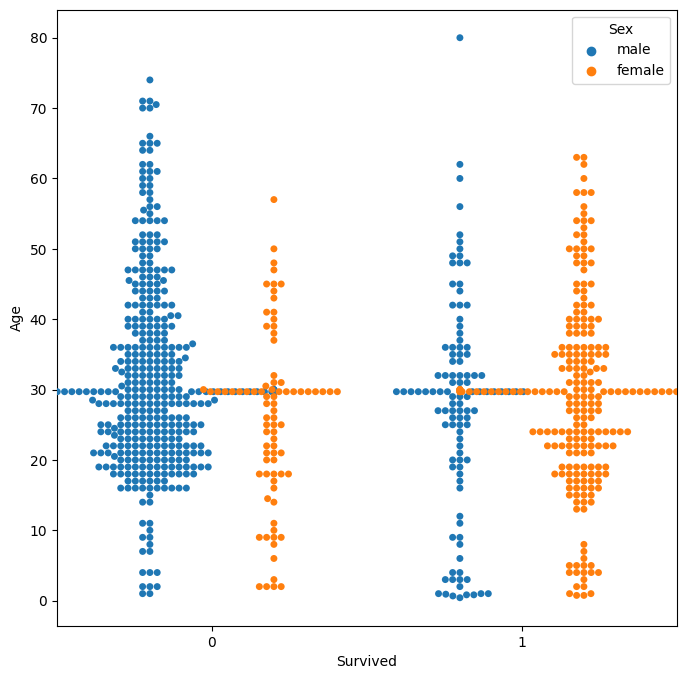

In [17]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=train_data, x='Survived',y='Age', hue='Sex', dodge=True)

In [18]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
for col_name in train_data.columns:
    if train_data[col_name].dtypes=='object':
        train_data[col_name]=labelencoder.fit_transform(train_data[col_name])

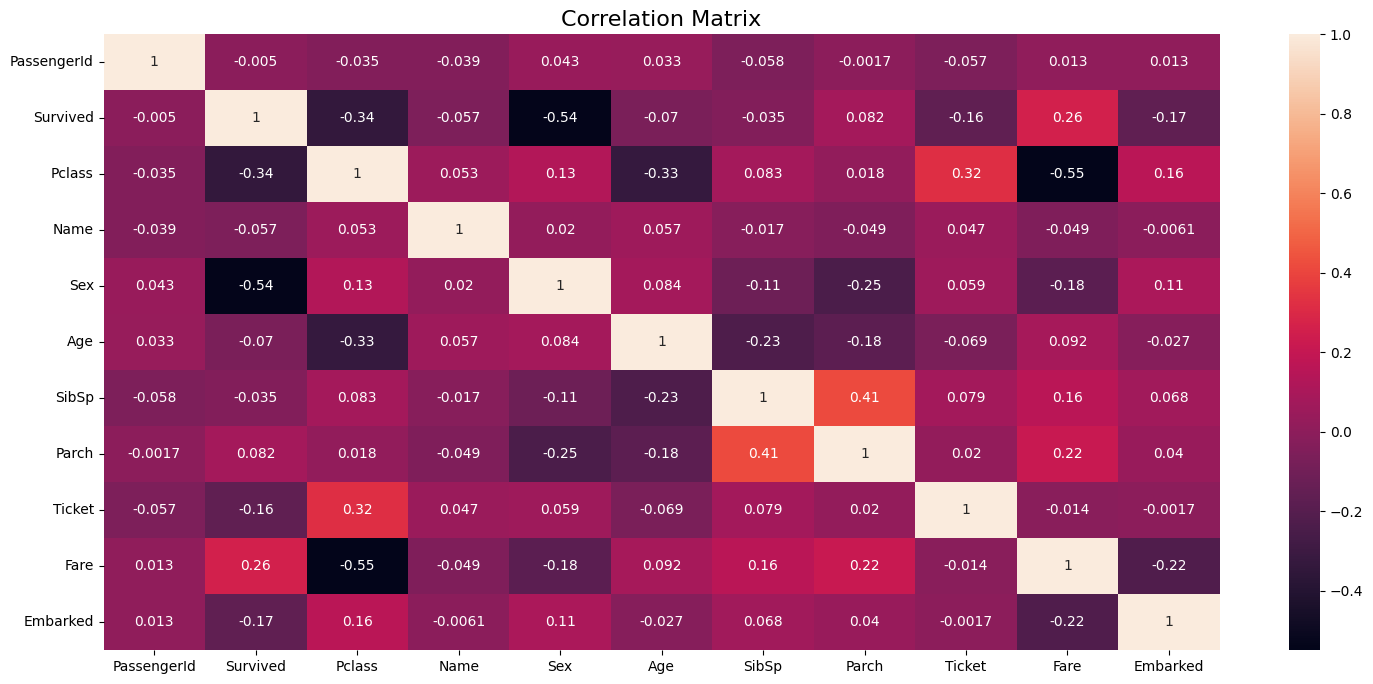

In [19]:
#Heatmap with feature correlation:
plt.figure(figsize=(18,8))
corr = train_data.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

In [20]:
#Model Building
X = train_data.drop(['Survived','PassengerId','Fare'], axis=1) 
y = train_data['Survived']

In [21]:
#Data Splitting
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state=42)

In [22]:
#Logistic Regression Model
l_model=LogisticRegression(random_state=42, max_iter=1000) 
l_model.fit(X_train, y_train)
lr_pred=l_model.predict(X_valid)
acc = accuracy_score(y_valid,lr_pred)*100
print("model Accuracy : ",acc)

model Accuracy :  82.12290502793296


In [23]:
#Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, n_estimators=50)
model_rf.fit(X_train, y_train)
rf_pred=model_rf.predict(X_valid)
rf_acc = accuracy_score(y_valid, rf_pred)*100
print("rf_acc:",rf_acc)

rf_acc: 82.68156424581005


In [24]:
#Comparing 2 Models
compare = {'model':['LogisticRegression','RandomForestClassifier'], 
           'Accuracy':[acc,rf_acc]}
compare_df = pd.DataFrame(compare)
compare_df

,model,Accuracy
0,LogisticRegression,82.122905
1,RandomForestClassifier,82.681564


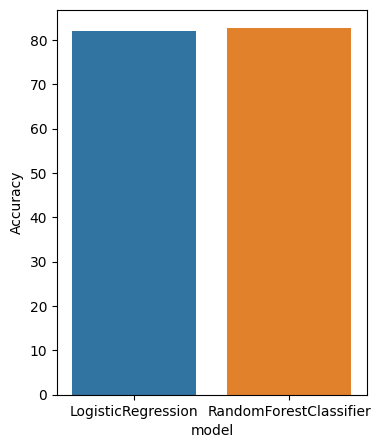

In [25]:
plt.figure(figsize=(4,5))
sns.barplot(x='model',y='Accuracy',data=compare_df)
plt.show()

In [26]:
#Testing Data
test_data.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
#Checking Null Values in Test Data
test_data.isnull().sum().sort_values(ascending=False) 

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [28]:
test_data = test_data.drop(['Cabin'],axis=1)

In [29]:
#Filling Null Values
for col_name in test_data.columns: 
    if test_data[col_name].dtypes=='object':
        test_data[col_name] = test_data[col_name].fillna(test_data[col_name].mode()[0])
    else:
        test_data[col_name] = test_data[col_name].fillna(test_data[col_name].mean())

In [30]:
test_data.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
#Label Encoder
labelencoder = LabelEncoder()
for col_name in test_data.columns:
    if test_data[col_name].dtypes=='object':
        test_data[col_name]=labelencoder.fit_transform(test_data[col_name])

In [32]:
test_data['Survived'] = model_rf.predict(test_data.drop(['PassengerId','Fare'],axis=1))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,206,1,34.5,0,0,152,7.8292,1,0
1,893,3,403,0,47.0,1,0,221,7.0000,2,1
2,894,2,269,1,62.0,0,0,73,9.6875,1,0
3,895,3,408,1,27.0,0,0,147,8.6625,2,0
4,896,3,178,0,22.0,1,1,138,12.2875,2,1


In [33]:
submission = test_data[['PassengerId','Survived']]
submission.to_csv("submission.csv", index=False)